## Define Dynamic Parameters

In [1]:
file_no = 0
my_seed = 64

In [2]:
# Parameters
file_no = 45
my_seed = 13


## Import Packages

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import ntpath

tf.random.set_seed(my_seed)
np.random.seed(my_seed)

## Import CSVs

In [4]:
ROOT_DIR = os.path.abspath(os.curdir)
path = ROOT_DIR + '\\..\\..\\Datasets\\processed\\regression_10d'
print(path)

csvfiles = glob.glob(path + "/*.csv")
dfs = []

for file in csvfiles:
    df = pd.read_csv(file)
    df.name = (ntpath.basename(file)).split(".",1)[0]
    dfs.append(df)

df = dfs[file_no]
print("Stock: ")
print(df.name)
print(my_seed)

C:\Users\Dell\Documents\B.Sc IT (Hons.) Computing and Business\FYP - Luke Bezzina\Code\mlpLearning\..\..\Datasets\processed\regression_10d


Stock: 
XOM_3d
13


# Splitting dataset in dependent and independent variables

In [5]:
x = np.array(df.iloc[:, 1:-1].values, dtype=np.float)
#x = np.array(df.iloc[:, 0:-1].values)
y = np.array(df.iloc[:, -1:].values)


# Splitting dataset (training + testing)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False, random_state=32)

print("Train - Independent Variables")
print(x_train)
print("Test - Independent Variables")
print(x_test)
# print("Train - Dependent Variables")
# print(y_train)
# print("Test - Dependent Variables")
# print(y_test)

# trg_cols_to_std = x_train[:, 10:12]
# test_cols_to_std = x_test[:, 10:12]
#
# scaler = StandardScaler()
# scaler.fit(trg_cols_to_std)
# trg_cols_to_std = scaler.transform(trg_cols_to_std)
# test_cols_to_std = scaler.transform(test_cols_to_std)
#
# x_train[:, 10:12] = trg_cols_to_std
# x_test[:, 10:12] = test_cols_to_std

Train - Independent Variables
[[-1.00000000e+00 -2.34000000e+00 -2.39000000e+00 ... -2.31303506e-02
   1.21503292e+00  8.62800000e+01]
 [-1.34000000e+00 -1.39000000e+00 -2.85000000e+00 ... -2.14249774e-02
   1.09767436e+00  8.47300000e+01]
 [-5.00000000e-02 -1.51000000e+00 -2.62000000e+00 ...  1.47918727e-02
   9.51231307e-01  8.58900000e+01]
 ...
 [ 2.15000000e+00  1.11000000e+00  1.20000000e+00 ...  2.51406477e-02
   8.89597662e-01  4.22500000e+01]
 [-1.04000000e+00 -9.50000000e-01 -1.22000000e+00 ...  2.32685774e-02
   7.77022522e-01  4.34700000e+01]
 [ 9.00000000e-02 -1.80000000e-01  4.60000000e-01 ...  2.32203773e-02
   7.92679002e-01  4.38500000e+01]]
Test - Independent Variables
[[-2.70000000e-01  3.70000000e-01 -1.50000000e-01 ... -1.33697948e-03
   7.89318694e-01  4.36400000e+01]
 [ 6.40000000e-01  1.20000000e-01  6.00000000e-01 ... -2.23365093e-02
   7.89585334e-01  4.34400000e+01]
 [-5.20000000e-01 -4.00000000e-02 -2.20000000e+00 ... -1.56125195e-02
   8.45712126e-01  4.4510

# Building ANN with MLP

In [7]:
ann = tf.keras.models.Sequential()
# hidden layers
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
# ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
# output layer
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

optimizer = tf.keras.optimizers.Adam()
ann.compile(optimizer = optimizer, loss = 'mean_squared_error')

ann.fit(x_train, y_train, batch_size = 32, epochs = 200)

weights = ann.get_weights()

Train on 894 samples
Epoch 1/200


 32/894 [>.............................] - ETA: 22s - loss: 7243.5186

894/894 [==============================] - 1s 981us/sample - loss: 7136.2945


Epoch 2/200
 32/894 [>.............................] - ETA: 0s - loss: 6946.2998

894/894 [==============================] - 0s 60us/sample - loss: 6436.3293


Epoch 3/200
 32/894 [>.............................] - ETA: 0s - loss: 5734.1094

832/894 [==========================>...] - ETA: 0s - loss: 5700.3639

894/894 [==============================] - 0s 67us/sample - loss: 5650.5391


Epoch 4/200
 32/894 [>.............................] - ETA: 0s - loss: 5299.0112

894/894 [==============================] - 0s 61us/sample - loss: 4820.4847


Epoch 5/200
 32/894 [>.............................] - ETA: 0s - loss: 4510.0215

864/894 [===========================>..] - ETA: 0s - loss: 4017.0933

894/894 [==============================] - 0s 66us/sample - loss: 4002.0400


Epoch 6/200
 32/894 [>.............................] - ETA: 0s - loss: 3317.7800

894/894 [==============================] - 0s 60us/sample - loss: 3229.6443


Epoch 7/200
 32/894 [>.............................] - ETA: 0s - loss: 2878.8989

864/894 [===========================>..] - ETA: 0s - loss: 2539.9007

894/894 [==============================] - 0s 64us/sample - loss: 2523.5340


Epoch 8/200
 32/894 [>.............................] - ETA: 0s - loss: 2296.8188

894/894 [==============================] - 0s 61us/sample - loss: 1899.8804


Epoch 9/200


 32/894 [>.............................] - ETA: 0s - loss: 1545.3750

864/894 [===========================>..] - ETA: 0s - loss: 1382.4921

894/894 [==============================] - 0s 65us/sample - loss: 1372.7155


Epoch 10/200
 32/894 [>.............................] - ETA: 0s - loss: 1154.8582

894/894 [==============================] - 0s 61us/sample - loss: 947.3607


Epoch 11/200
 32/894 [>.............................] - ETA: 0s - loss: 717.0907

894/894 [==============================] - 0s 61us/sample - loss: 621.8793


Epoch 12/200


 32/894 [>.............................] - ETA: 0s - loss: 475.7738

894/894 [==============================] - 0s 61us/sample - loss: 388.4093


Epoch 13/200
 32/894 [>.............................] - ETA: 0s - loss: 283.4764

864/894 [===========================>..] - ETA: 0s - loss: 231.7273

894/894 [==============================] - 0s 66us/sample - loss: 230.3819


Epoch 14/200
 32/894 [>.............................] - ETA: 0s - loss: 162.1622

894/894 [==============================] - 0s 61us/sample - loss: 130.1699


Epoch 15/200


 32/894 [>.............................] - ETA: 0s - loss: 89.6120

864/894 [===========================>..] - ETA: 0s - loss: 71.9381

894/894 [==============================] - 0s 64us/sample - loss: 70.9876


Epoch 16/200
 32/894 [>.............................] - ETA: 0s - loss: 50.1510

864/894 [===========================>..] - ETA: 0s - loss: 38.0114

894/894 [==============================] - 0s 64us/sample - loss: 37.6725


Epoch 17/200
 32/894 [>.............................] - ETA: 0s - loss: 31.6056

894/894 [==============================] - 0s 61us/sample - loss: 20.5173


Epoch 18/200


 32/894 [>.............................] - ETA: 0s - loss: 15.1157

894/894 [==============================] - 0s 60us/sample - loss: 11.9053


Epoch 19/200
 32/894 [>.............................] - ETA: 0s - loss: 7.9097

864/894 [===========================>..] - ETA: 0s - loss: 7.8575

894/894 [==============================] - 0s 62us/sample - loss: 7.7623


Epoch 20/200
 32/894 [>.............................] - ETA: 0s - loss: 5.4424

864/894 [===========================>..] - ETA: 0s - loss: 5.7911

894/894 [==============================] - 0s 66us/sample - loss: 5.8312


Epoch 21/200


 32/894 [>.............................] - ETA: 0s - loss: 4.9361

864/894 [===========================>..] - ETA: 0s - loss: 4.9942

894/894 [==============================] - 0s 65us/sample - loss: 4.9167


Epoch 22/200
 32/894 [>.............................] - ETA: 0s - loss: 3.0409

894/894 [==============================] - 0s 61us/sample - loss: 4.4379


Epoch 23/200
 32/894 [>.............................] - ETA: 0s - loss: 4.1886

864/894 [===========================>..] - ETA: 0s - loss: 4.1843

894/894 [==============================] - 0s 62us/sample - loss: 4.1609


Epoch 24/200
 32/894 [>.............................] - ETA: 0s - loss: 2.7918

864/894 [===========================>..] - ETA: 0s - loss: 4.0221

894/894 [==============================] - 0s 64us/sample - loss: 3.9681


Epoch 25/200
 32/894 [>.............................] - ETA: 0s - loss: 3.8080

864/894 [===========================>..] - ETA: 0s - loss: 3.7939

894/894 [==============================] - 0s 65us/sample - loss: 3.8220


Epoch 26/200
 32/894 [>.............................] - ETA: 0s - loss: 2.5026

768/894 [========================>.....] - ETA: 0s - loss: 3.5665

894/894 [==============================] - 0s 74us/sample - loss: 3.6912


Epoch 27/200


 32/894 [>.............................] - ETA: 0s - loss: 2.7328

864/894 [===========================>..] - ETA: 0s - loss: 3.5815

894/894 [==============================] - 0s 66us/sample - loss: 3.5819


Epoch 28/200
 32/894 [>.............................] - ETA: 0s - loss: 2.6261

894/894 [==============================] - 0s 61us/sample - loss: 3.4794


Epoch 29/200
 32/894 [>.............................] - ETA: 0s - loss: 4.2004

864/894 [===========================>..] - ETA: 0s - loss: 3.3382

894/894 [==============================] - 0s 64us/sample - loss: 3.3813


Epoch 30/200
 32/894 [>.............................] - ETA: 0s - loss: 2.2641

894/894 [==============================] - 0s 60us/sample - loss: 3.2939


Epoch 31/200
 32/894 [>.............................] - ETA: 0s - loss: 2.7881

864/894 [===========================>..] - ETA: 0s - loss: 3.2485

894/894 [==============================] - 0s 65us/sample - loss: 3.2138


Epoch 32/200
 32/894 [>.............................] - ETA: 0s - loss: 2.7550

894/894 [==============================] - 0s 60us/sample - loss: 3.1382


Epoch 33/200


 32/894 [>.............................] - ETA: 0s - loss: 6.1221

864/894 [===========================>..] - ETA: 0s - loss: 3.0868

894/894 [==============================] - 0s 65us/sample - loss: 3.0646


Epoch 34/200
 32/894 [>.............................] - ETA: 0s - loss: 3.1769

864/894 [===========================>..] - ETA: 0s - loss: 2.9232

894/894 [==============================] - 0s 64us/sample - loss: 3.0006


Epoch 35/200
 32/894 [>.............................] - ETA: 0s - loss: 4.6131

894/894 [==============================] - 0s 59us/sample - loss: 2.9424


Epoch 36/200


 32/894 [>.............................] - ETA: 0s - loss: 4.5026

894/894 [==============================] - 0s 62us/sample - loss: 2.8874


Epoch 37/200
 32/894 [>.............................] - ETA: 0s - loss: 1.9618

894/894 [==============================] - 0s 61us/sample - loss: 2.8349


Epoch 38/200
 32/894 [>.............................] - ETA: 0s - loss: 2.0733

894/894 [==============================] - 0s 60us/sample - loss: 2.7886


Epoch 39/200
 32/894 [>.............................] - ETA: 0s - loss: 6.5266

864/894 [===========================>..] - ETA: 0s - loss: 2.7894

894/894 [==============================] - 0s 65us/sample - loss: 2.7468


Epoch 40/200
 32/894 [>.............................] - ETA: 0s - loss: 1.3897

894/894 [==============================] - 0s 60us/sample - loss: 2.7123


Epoch 41/200
 32/894 [>.............................] - ETA: 0s - loss: 1.7799

894/894 [==============================] - 0s 61us/sample - loss: 2.6757


Epoch 42/200
 32/894 [>.............................] - ETA: 0s - loss: 5.0978

864/894 [===========================>..] - ETA: 0s - loss: 2.6116

894/894 [==============================] - 0s 64us/sample - loss: 2.6373


Epoch 43/200
 32/894 [>.............................] - ETA: 0s - loss: 1.7246

864/894 [===========================>..] - ETA: 0s - loss: 2.5988

894/894 [==============================] - 0s 64us/sample - loss: 2.6080


Epoch 44/200


 32/894 [>.............................] - ETA: 0s - loss: 1.3579

894/894 [==============================] - 0s 61us/sample - loss: 2.5793


Epoch 45/200
 32/894 [>.............................] - ETA: 0s - loss: 1.9488

894/894 [==============================] - 0s 59us/sample - loss: 2.5558


Epoch 46/200


 32/894 [>.............................] - ETA: 0s - loss: 1.2239

864/894 [===========================>..] - ETA: 0s - loss: 2.5836

894/894 [==============================] - 0s 65us/sample - loss: 2.5312


Epoch 47/200
 32/894 [>.............................] - ETA: 0s - loss: 1.7010

864/894 [===========================>..] - ETA: 0s - loss: 2.4946

894/894 [==============================] - 0s 65us/sample - loss: 2.5090


Epoch 48/200
 32/894 [>.............................] - ETA: 0s - loss: 1.8849

864/894 [===========================>..] - ETA: 0s - loss: 2.5157

894/894 [==============================] - 0s 65us/sample - loss: 2.4911


Epoch 49/200
 32/894 [>.............................] - ETA: 0s - loss: 5.2684

864/894 [===========================>..] - ETA: 0s - loss: 2.4549

894/894 [==============================] - 0s 64us/sample - loss: 2.4702


Epoch 50/200
 32/894 [>.............................] - ETA: 0s - loss: 1.2875

894/894 [==============================] - 0s 59us/sample - loss: 2.4536


Epoch 51/200
 32/894 [>.............................] - ETA: 0s - loss: 1.2266

894/894 [==============================] - 0s 61us/sample - loss: 2.4380


Epoch 52/200
 32/894 [>.............................] - ETA: 0s - loss: 1.8073

894/894 [==============================] - 0s 60us/sample - loss: 2.4254


Epoch 53/200
 32/894 [>.............................] - ETA: 0s - loss: 2.9963

894/894 [==============================] - 0s 61us/sample - loss: 2.4109


Epoch 54/200
 32/894 [>.............................] - ETA: 0s - loss: 3.4236

894/894 [==============================] - 0s 62us/sample - loss: 2.4003


Epoch 55/200
 32/894 [>.............................] - ETA: 0s - loss: 1.3722

864/894 [===========================>..] - ETA: 0s - loss: 2.3551

894/894 [==============================] - 0s 65us/sample - loss: 2.3860


Epoch 56/200
 32/894 [>.............................] - ETA: 0s - loss: 1.1745

864/894 [===========================>..] - ETA: 0s - loss: 2.3946

894/894 [==============================] - 0s 64us/sample - loss: 2.3703


Epoch 57/200
 32/894 [>.............................] - ETA: 0s - loss: 1.7938

864/894 [===========================>..] - ETA: 0s - loss: 2.3245

894/894 [==============================] - 0s 65us/sample - loss: 2.3595


Epoch 58/200
 32/894 [>.............................] - ETA: 0s - loss: 3.9717

864/894 [===========================>..] - ETA: 0s - loss: 2.3408

894/894 [==============================] - 0s 62us/sample - loss: 2.3503


Epoch 59/200


 32/894 [>.............................] - ETA: 0s - loss: 2.3800

864/894 [===========================>..] - ETA: 0s - loss: 2.3085

894/894 [==============================] - 0s 64us/sample - loss: 2.3376


Epoch 60/200
 32/894 [>.............................] - ETA: 0s - loss: 1.9172

894/894 [==============================] - 0s 61us/sample - loss: 2.3286


Epoch 61/200
 32/894 [>.............................] - ETA: 0s - loss: 1.9152

864/894 [===========================>..] - ETA: 0s - loss: 2.3599

894/894 [==============================] - 0s 65us/sample - loss: 2.3184


Epoch 62/200


 32/894 [>.............................] - ETA: 0s - loss: 1.8648

864/894 [===========================>..] - ETA: 0s - loss: 2.3276

894/894 [==============================] - 0s 65us/sample - loss: 2.3112


Epoch 63/200
 32/894 [>.............................] - ETA: 0s - loss: 1.3423

864/894 [===========================>..] - ETA: 0s - loss: 2.2790

894/894 [==============================] - 0s 65us/sample - loss: 2.2996


Epoch 64/200
 32/894 [>.............................] - ETA: 0s - loss: 3.0503

894/894 [==============================] - 0s 61us/sample - loss: 2.2913


Epoch 65/200


 32/894 [>.............................] - ETA: 0s - loss: 2.8616

894/894 [==============================] - 0s 62us/sample - loss: 2.2840


Epoch 66/200
 32/894 [>.............................] - ETA: 0s - loss: 1.7329

894/894 [==============================] - 0s 62us/sample - loss: 2.2757


Epoch 67/200
 32/894 [>.............................] - ETA: 0s - loss: 2.5334

864/894 [===========================>..] - ETA: 0s - loss: 2.2616

894/894 [==============================] - 0s 64us/sample - loss: 2.2639


Epoch 68/200
 32/894 [>.............................] - ETA: 0s - loss: 4.4453

864/894 [===========================>..] - ETA: 0s - loss: 2.2575

894/894 [==============================] - 0s 67us/sample - loss: 2.2583


Epoch 69/200


 32/894 [>.............................] - ETA: 0s - loss: 2.9152

864/894 [===========================>..] - ETA: 0s - loss: 2.2033

894/894 [==============================] - 0s 64us/sample - loss: 2.2478


Epoch 70/200
 32/894 [>.............................] - ETA: 0s - loss: 1.2348

894/894 [==============================] - 0s 61us/sample - loss: 2.2405


Epoch 71/200
 32/894 [>.............................] - ETA: 0s - loss: 1.9979

894/894 [==============================] - 0s 60us/sample - loss: 2.2324


Epoch 72/200
 32/894 [>.............................] - ETA: 0s - loss: 2.6931

894/894 [==============================] - 0s 61us/sample - loss: 2.2285


Epoch 73/200
 32/894 [>.............................] - ETA: 0s - loss: 2.3782

894/894 [==============================] - 0s 61us/sample - loss: 2.2133


Epoch 74/200
 32/894 [>.............................] - ETA: 0s - loss: 2.7036

864/894 [===========================>..] - ETA: 0s - loss: 2.2124

894/894 [==============================] - 0s 64us/sample - loss: 2.2091


Epoch 75/200
 32/894 [>.............................] - ETA: 0s - loss: 1.7859

894/894 [==============================] - 0s 60us/sample - loss: 2.2009


Epoch 76/200
 32/894 [>.............................] - ETA: 0s - loss: 2.4424

894/894 [==============================] - 0s 60us/sample - loss: 2.1931


Epoch 77/200
 32/894 [>.............................] - ETA: 0s - loss: 4.5990

894/894 [==============================] - 0s 61us/sample - loss: 2.1847


Epoch 78/200
 32/894 [>.............................] - ETA: 0s - loss: 2.6034

894/894 [==============================] - 0s 60us/sample - loss: 2.1763


Epoch 79/200
 32/894 [>.............................] - ETA: 0s - loss: 1.5889

894/894 [==============================] - 0s 61us/sample - loss: 2.1704


Epoch 80/200
 32/894 [>.............................] - ETA: 0s - loss: 1.7299

864/894 [===========================>..] - ETA: 0s - loss: 2.1342

894/894 [==============================] - 0s 64us/sample - loss: 2.1601


Epoch 81/200
 32/894 [>.............................] - ETA: 0s - loss: 3.6792

864/894 [===========================>..] - ETA: 0s - loss: 2.1637

894/894 [==============================] - 0s 62us/sample - loss: 2.1560


Epoch 82/200
 32/894 [>.............................] - ETA: 0s - loss: 3.6277

864/894 [===========================>..] - ETA: 0s - loss: 2.1916

894/894 [==============================] - 0s 64us/sample - loss: 2.1466


Epoch 83/200
 32/894 [>.............................] - ETA: 0s - loss: 1.6008

894/894 [==============================] - 0s 61us/sample - loss: 2.1400


Epoch 84/200
 32/894 [>.............................] - ETA: 0s - loss: 3.0067

864/894 [===========================>..] - ETA: 0s - loss: 2.1264

894/894 [==============================] - 0s 66us/sample - loss: 2.1401


Epoch 85/200


 32/894 [>.............................] - ETA: 0s - loss: 1.5774

864/894 [===========================>..] - ETA: 0s - loss: 2.1364

894/894 [==============================] - 0s 65us/sample - loss: 2.1243


Epoch 86/200
 32/894 [>.............................] - ETA: 0s - loss: 1.7541

864/894 [===========================>..] - ETA: 0s - loss: 2.1319

894/894 [==============================] - 0s 65us/sample - loss: 2.1176


Epoch 87/200
 32/894 [>.............................] - ETA: 0s - loss: 1.7531

894/894 [==============================] - 0s 58us/sample - loss: 2.1115


Epoch 88/200


 32/894 [>.............................] - ETA: 0s - loss: 1.5307

894/894 [==============================] - 0s 60us/sample - loss: 2.1074


Epoch 89/200
 32/894 [>.............................] - ETA: 0s - loss: 2.1031

894/894 [==============================] - 0s 61us/sample - loss: 2.0929


Epoch 90/200
 32/894 [>.............................] - ETA: 0s - loss: 1.0473

864/894 [===========================>..] - ETA: 0s - loss: 2.1107

894/894 [==============================] - 0s 64us/sample - loss: 2.0929


Epoch 91/200
 32/894 [>.............................] - ETA: 0s - loss: 1.4933

894/894 [==============================] - 0s 60us/sample - loss: 2.0847


Epoch 92/200
 32/894 [>.............................] - ETA: 0s - loss: 2.1309

864/894 [===========================>..] - ETA: 0s - loss: 2.0254

894/894 [==============================] - 0s 65us/sample - loss: 2.0713


Epoch 93/200
 32/894 [>.............................] - ETA: 0s - loss: 1.2237

894/894 [==============================] - 0s 61us/sample - loss: 2.0691


Epoch 94/200
 32/894 [>.............................] - ETA: 0s - loss: 2.8210

864/894 [===========================>..] - ETA: 0s - loss: 2.0732

894/894 [==============================] - 0s 62us/sample - loss: 2.0644


Epoch 95/200
 32/894 [>.............................] - ETA: 0s - loss: 5.3813

894/894 [==============================] - 0s 62us/sample - loss: 2.0559


Epoch 96/200
 32/894 [>.............................] - ETA: 0s - loss: 1.5146

864/894 [===========================>..] - ETA: 0s - loss: 2.0086

894/894 [==============================] - 0s 65us/sample - loss: 2.0445


Epoch 97/200


 32/894 [>.............................] - ETA: 0s - loss: 2.3716

800/894 [=========================>....] - ETA: 0s - loss: 2.0362

894/894 [==============================] - 0s 74us/sample - loss: 2.0416


Epoch 98/200
 32/894 [>.............................] - ETA: 0s - loss: 3.3903

736/894 [=======================>......] - ETA: 0s - loss: 1.9532

894/894 [==============================] - 0s 74us/sample - loss: 2.0345


Epoch 99/200
 32/894 [>.............................] - ETA: 0s - loss: 2.1511

894/894 [==============================] - 0s 60us/sample - loss: 2.0284


Epoch 100/200


 32/894 [>.............................] - ETA: 0s - loss: 1.1133

864/894 [===========================>..] - ETA: 0s - loss: 1.9642

894/894 [==============================] - 0s 65us/sample - loss: 2.0181


Epoch 101/200
 32/894 [>.............................] - ETA: 0s - loss: 2.0036

894/894 [==============================] - 0s 61us/sample - loss: 2.0126


Epoch 102/200
 32/894 [>.............................] - ETA: 0s - loss: 1.5817

864/894 [===========================>..] - ETA: 0s - loss: 1.9621

894/894 [==============================] - 0s 65us/sample - loss: 2.0045


Epoch 103/200
 32/894 [>.............................] - ETA: 0s - loss: 3.6213

832/894 [==========================>...] - ETA: 0s - loss: 2.0443

894/894 [==============================] - 0s 68us/sample - loss: 2.0007


Epoch 104/200
 32/894 [>.............................] - ETA: 0s - loss: 2.2313

832/894 [==========================>...] - ETA: 0s - loss: 2.0089

894/894 [==============================] - 0s 68us/sample - loss: 1.9962


Epoch 105/200
 32/894 [>.............................] - ETA: 0s - loss: 2.1446

864/894 [===========================>..] - ETA: 0s - loss: 1.9254

894/894 [==============================] - 0s 62us/sample - loss: 1.9871


Epoch 106/200
 32/894 [>.............................] - ETA: 0s - loss: 2.6050

894/894 [==============================] - 0s 60us/sample - loss: 1.9849


Epoch 107/200
 32/894 [>.............................] - ETA: 0s - loss: 1.3098

864/894 [===========================>..] - ETA: 0s - loss: 2.0092

894/894 [==============================] - 0s 65us/sample - loss: 1.9760


Epoch 108/200
 32/894 [>.............................] - ETA: 0s - loss: 1.9444

768/894 [========================>.....] - ETA: 0s - loss: 2.0408

894/894 [==============================] - 0s 77us/sample - loss: 1.9713


Epoch 109/200
 32/894 [>.............................] - ETA: 0s - loss: 1.4990

864/894 [===========================>..] - ETA: 0s - loss: 1.9745

894/894 [==============================] - 0s 68us/sample - loss: 1.9625


Epoch 110/200
 32/894 [>.............................] - ETA: 0s - loss: 1.3996

832/894 [==========================>...] - ETA: 0s - loss: 2.0054

894/894 [==============================] - 0s 68us/sample - loss: 1.9567


Epoch 111/200
 32/894 [>.............................] - ETA: 0s - loss: 1.9974

800/894 [=========================>....] - ETA: 0s - loss: 1.9918

894/894 [==============================] - 0s 67us/sample - loss: 1.9556


Epoch 112/200
 32/894 [>.............................] - ETA: 0s - loss: 1.7020

864/894 [===========================>..] - ETA: 0s - loss: 1.9787

894/894 [==============================] - 0s 62us/sample - loss: 1.9484


Epoch 113/200
 32/894 [>.............................] - ETA: 0s - loss: 0.9474

832/894 [==========================>...] - ETA: 0s - loss: 1.9833

894/894 [==============================] - 0s 67us/sample - loss: 1.9374


Epoch 114/200
 32/894 [>.............................] - ETA: 0s - loss: 1.1511

832/894 [==========================>...] - ETA: 0s - loss: 1.9701

894/894 [==============================] - 0s 66us/sample - loss: 1.9364


Epoch 115/200


 32/894 [>.............................] - ETA: 0s - loss: 2.2574

832/894 [==========================>...] - ETA: 0s - loss: 1.8151

894/894 [==============================] - 0s 66us/sample - loss: 1.9327


Epoch 116/200
 32/894 [>.............................] - ETA: 0s - loss: 1.1463

864/894 [===========================>..] - ETA: 0s - loss: 1.8642

894/894 [==============================] - 0s 64us/sample - loss: 1.9196


Epoch 117/200
 32/894 [>.............................] - ETA: 0s - loss: 2.2147

894/894 [==============================] - 0s 61us/sample - loss: 1.9222


Epoch 118/200
 32/894 [>.............................] - ETA: 0s - loss: 1.1161

894/894 [==============================] - 0s 60us/sample - loss: 1.9100


Epoch 119/200
 32/894 [>.............................] - ETA: 0s - loss: 1.4969

864/894 [===========================>..] - ETA: 0s - loss: 1.9230

894/894 [==============================] - 0s 66us/sample - loss: 1.9044


Epoch 120/200
 32/894 [>.............................] - ETA: 0s - loss: 0.9643

832/894 [==========================>...] - ETA: 0s - loss: 1.8767

894/894 [==============================] - 0s 66us/sample - loss: 1.9021


Epoch 121/200
 32/894 [>.............................] - ETA: 0s - loss: 1.2092

894/894 [==============================] - 0s 60us/sample - loss: 1.8943


Epoch 122/200


 32/894 [>.............................] - ETA: 0s - loss: 1.7032

894/894 [==============================] - 0s 59us/sample - loss: 1.8962


Epoch 123/200
 32/894 [>.............................] - ETA: 0s - loss: 2.3860

864/894 [===========================>..] - ETA: 0s - loss: 1.8425

894/894 [==============================] - 0s 64us/sample - loss: 1.8875


Epoch 124/200
 32/894 [>.............................] - ETA: 0s - loss: 1.2074

864/894 [===========================>..] - ETA: 0s - loss: 1.8588

894/894 [==============================] - 0s 65us/sample - loss: 1.8768


Epoch 125/200
 32/894 [>.............................] - ETA: 0s - loss: 2.3815

832/894 [==========================>...] - ETA: 0s - loss: 1.8511

894/894 [==============================] - 0s 67us/sample - loss: 1.8763


Epoch 126/200
 32/894 [>.............................] - ETA: 0s - loss: 0.8632

894/894 [==============================] - 0s 61us/sample - loss: 1.8658


Epoch 127/200
 32/894 [>.............................] - ETA: 0s - loss: 1.1810

832/894 [==========================>...] - ETA: 0s - loss: 1.8442

894/894 [==============================] - 0s 68us/sample - loss: 1.8630


Epoch 128/200
 32/894 [>.............................] - ETA: 0s - loss: 2.0722

832/894 [==========================>...] - ETA: 0s - loss: 1.8733

894/894 [==============================] - 0s 66us/sample - loss: 1.8566


Epoch 129/200
 32/894 [>.............................] - ETA: 0s - loss: 3.0311

894/894 [==============================] - 0s 61us/sample - loss: 1.8533


Epoch 130/200


 32/894 [>.............................] - ETA: 0s - loss: 1.3087

800/894 [=========================>....] - ETA: 0s - loss: 1.9053

894/894 [==============================] - 0s 70us/sample - loss: 1.8537


Epoch 131/200


 32/894 [>.............................] - ETA: 0s - loss: 1.8590

832/894 [==========================>...] - ETA: 0s - loss: 1.8439

894/894 [==============================] - 0s 67us/sample - loss: 1.8491


Epoch 132/200


 32/894 [>.............................] - ETA: 0s - loss: 1.8877

832/894 [==========================>...] - ETA: 0s - loss: 1.8559

894/894 [==============================] - 0s 67us/sample - loss: 1.8384


Epoch 133/200
 32/894 [>.............................] - ETA: 0s - loss: 0.8766



864/894 [===========================>..] - ETA: 0s - loss: 1.8089

894/894 [==============================] - 0s 66us/sample - loss: 1.8362


Epoch 134/200
 32/894 [>.............................] - ETA: 0s - loss: 2.1292



832/894 [==========================>...] - ETA: 0s - loss: 1.8239

894/894 [==============================] - 0s 69us/sample - loss: 1.8334


Epoch 135/200
 32/894 [>.............................] - ETA: 0s - loss: 2.1398

832/894 [==========================>...] - ETA: 0s - loss: 1.8013

894/894 [==============================] - 0s 69us/sample - loss: 1.8262


Epoch 136/200
 32/894 [>.............................] - ETA: 0s - loss: 0.7890

864/894 [===========================>..] - ETA: 0s - loss: 1.8281

894/894 [==============================] - 0s 65us/sample - loss: 1.8193


Epoch 137/200
 32/894 [>.............................] - ETA: 0s - loss: 1.6726

864/894 [===========================>..] - ETA: 0s - loss: 1.8267

894/894 [==============================] - 0s 65us/sample - loss: 1.8156


Epoch 138/200
 32/894 [>.............................] - ETA: 0s - loss: 3.1072

864/894 [===========================>..] - ETA: 0s - loss: 1.7574

894/894 [==============================] - 0s 66us/sample - loss: 1.8143


Epoch 139/200
 32/894 [>.............................] - ETA: 0s - loss: 2.8994

832/894 [==========================>...] - ETA: 0s - loss: 1.8066

894/894 [==============================] - 0s 66us/sample - loss: 1.8114


Epoch 140/200
 32/894 [>.............................] - ETA: 0s - loss: 1.3134

864/894 [===========================>..] - ETA: 0s - loss: 1.7940

894/894 [==============================] - 0s 62us/sample - loss: 1.8057


Epoch 141/200


 32/894 [>.............................] - ETA: 0s - loss: 1.3728

832/894 [==========================>...] - ETA: 0s - loss: 1.8188

894/894 [==============================] - 0s 69us/sample - loss: 1.7973


Epoch 142/200


 32/894 [>.............................] - ETA: 0s - loss: 1.8207

768/894 [========================>.....] - ETA: 0s - loss: 1.8389

894/894 [==============================] - 0s 70us/sample - loss: 1.7988


Epoch 143/200


 32/894 [>.............................] - ETA: 0s - loss: 1.3815

864/894 [===========================>..] - ETA: 0s - loss: 1.7929

894/894 [==============================] - 0s 66us/sample - loss: 1.7959


Epoch 144/200
 32/894 [>.............................] - ETA: 0s - loss: 2.9819

864/894 [===========================>..] - ETA: 0s - loss: 1.7863

894/894 [==============================] - 0s 66us/sample - loss: 1.7933


Epoch 145/200
 32/894 [>.............................] - ETA: 0s - loss: 1.0505

864/894 [===========================>..] - ETA: 0s - loss: 1.7759

894/894 [==============================] - 0s 66us/sample - loss: 1.7804


Epoch 146/200
 32/894 [>.............................] - ETA: 0s - loss: 0.8324

832/894 [==========================>...] - ETA: 0s - loss: 1.7249

894/894 [==============================] - 0s 67us/sample - loss: 1.7812


Epoch 147/200
 32/894 [>.............................] - ETA: 0s - loss: 1.5667

864/894 [===========================>..] - ETA: 0s - loss: 1.7922

894/894 [==============================] - 0s 65us/sample - loss: 1.7795


Epoch 148/200
 32/894 [>.............................] - ETA: 0s - loss: 1.6890

864/894 [===========================>..] - ETA: 0s - loss: 1.7915

894/894 [==============================] - 0s 65us/sample - loss: 1.7768


Epoch 149/200


 32/894 [>.............................] - ETA: 0s - loss: 2.1505

894/894 [==============================] - 0s 59us/sample - loss: 1.7742


Epoch 150/200
 32/894 [>.............................] - ETA: 0s - loss: 1.2861

894/894 [==============================] - 0s 62us/sample - loss: 1.7621


Epoch 151/200
 32/894 [>.............................] - ETA: 0s - loss: 1.0751

864/894 [===========================>..] - ETA: 0s - loss: 1.7757

894/894 [==============================] - 0s 65us/sample - loss: 1.7601


Epoch 152/200


 32/894 [>.............................] - ETA: 0s - loss: 0.9930

832/894 [==========================>...] - ETA: 0s - loss: 1.6964

894/894 [==============================] - 0s 66us/sample - loss: 1.7544


Epoch 153/200
 32/894 [>.............................] - ETA: 0s - loss: 1.3889

832/894 [==========================>...] - ETA: 0s - loss: 1.7328

894/894 [==============================] - 0s 66us/sample - loss: 1.7521


Epoch 154/200
 32/894 [>.............................] - ETA: 0s - loss: 2.6024

864/894 [===========================>..] - ETA: 0s - loss: 1.7376

894/894 [==============================] - 0s 66us/sample - loss: 1.7518


Epoch 155/200
 32/894 [>.............................] - ETA: 0s - loss: 2.0182

894/894 [==============================] - 0s 62us/sample - loss: 1.7485


Epoch 156/200
 32/894 [>.............................] - ETA: 0s - loss: 3.1556

832/894 [==========================>...] - ETA: 0s - loss: 1.7550

894/894 [==============================] - 0s 67us/sample - loss: 1.7481


Epoch 157/200


 32/894 [>.............................] - ETA: 0s - loss: 2.6424

800/894 [=========================>....] - ETA: 0s - loss: 1.7326

894/894 [==============================] - 0s 71us/sample - loss: 1.7421


Epoch 158/200
 32/894 [>.............................] - ETA: 0s - loss: 1.4396

832/894 [==========================>...] - ETA: 0s - loss: 1.7129



894/894 [==============================] - 0s 67us/sample - loss: 1.7364


Epoch 159/200
 32/894 [>.............................] - ETA: 0s - loss: 1.1292



832/894 [==========================>...] - ETA: 0s - loss: 1.7503

894/894 [==============================] - 0s 68us/sample - loss: 1.7341


Epoch 160/200
 32/894 [>.............................] - ETA: 0s - loss: 1.9269

832/894 [==========================>...] - ETA: 0s - loss: 1.7706

894/894 [==============================] - 0s 67us/sample - loss: 1.7325


Epoch 161/200
 32/894 [>.............................] - ETA: 0s - loss: 1.4708

864/894 [===========================>..] - ETA: 0s - loss: 1.6989

894/894 [==============================] - 0s 67us/sample - loss: 1.7320


Epoch 162/200
 32/894 [>.............................] - ETA: 0s - loss: 1.9464

864/894 [===========================>..] - ETA: 0s - loss: 1.7154

894/894 [==============================] - 0s 67us/sample - loss: 1.7219


Epoch 163/200
 32/894 [>.............................] - ETA: 0s - loss: 1.8022

832/894 [==========================>...] - ETA: 0s - loss: 1.7368

894/894 [==============================] - 0s 68us/sample - loss: 1.7251


Epoch 164/200
 32/894 [>.............................] - ETA: 0s - loss: 2.0390

800/894 [=========================>....] - ETA: 0s - loss: 1.6884

894/894 [==============================] - 0s 70us/sample - loss: 1.7180


Epoch 165/200
 32/894 [>.............................] - ETA: 0s - loss: 1.8607

894/894 [==============================] - 0s 59us/sample - loss: 1.7156


Epoch 166/200
 32/894 [>.............................] - ETA: 0s - loss: 1.3248

832/894 [==========================>...] - ETA: 0s - loss: 1.7014

894/894 [==============================] - 0s 66us/sample - loss: 1.7169


Epoch 167/200
 32/894 [>.............................] - ETA: 0s - loss: 1.6020

894/894 [==============================] - 0s 61us/sample - loss: 1.7094


Epoch 168/200
 32/894 [>.............................] - ETA: 0s - loss: 1.2200

864/894 [===========================>..] - ETA: 0s - loss: 1.7278

894/894 [==============================] - 0s 64us/sample - loss: 1.7168


Epoch 169/200
 32/894 [>.............................] - ETA: 0s - loss: 0.8096

894/894 [==============================] - 0s 61us/sample - loss: 1.7078


Epoch 170/200
 32/894 [>.............................] - ETA: 0s - loss: 2.9902

864/894 [===========================>..] - ETA: 0s - loss: 1.7137

894/894 [==============================] - 0s 66us/sample - loss: 1.7107


Epoch 171/200
 32/894 [>.............................] - ETA: 0s - loss: 1.4922

864/894 [===========================>..] - ETA: 0s - loss: 1.6780



894/894 [==============================] - 0s 65us/sample - loss: 1.7052


Epoch 172/200
 32/894 [>.............................] - ETA: 0s - loss: 1.5265

864/894 [===========================>..] - ETA: 0s - loss: 1.7220

894/894 [==============================] - 0s 64us/sample - loss: 1.7102


Epoch 173/200


 32/894 [>.............................] - ETA: 0s - loss: 1.5916

894/894 [==============================] - 0s 62us/sample - loss: 1.6977


Epoch 174/200
 32/894 [>.............................] - ETA: 0s - loss: 1.1622

894/894 [==============================] - 0s 61us/sample - loss: 1.6959


Epoch 175/200
 32/894 [>.............................] - ETA: 0s - loss: 1.1457

864/894 [===========================>..] - ETA: 0s - loss: 1.7219

894/894 [==============================] - 0s 67us/sample - loss: 1.6974


Epoch 176/200
 32/894 [>.............................] - ETA: 0s - loss: 1.7144

894/894 [==============================] - 0s 59us/sample - loss: 1.6869


Epoch 177/200
 32/894 [>.............................] - ETA: 0s - loss: 1.4435

864/894 [===========================>..] - ETA: 0s - loss: 1.7074

894/894 [==============================] - 0s 64us/sample - loss: 1.6845


Epoch 178/200
 32/894 [>.............................] - ETA: 0s - loss: 1.4903

894/894 [==============================] - 0s 58us/sample - loss: 1.6928


Epoch 179/200


 32/894 [>.............................] - ETA: 0s - loss: 1.3665

864/894 [===========================>..] - ETA: 0s - loss: 1.6536

894/894 [==============================] - 0s 64us/sample - loss: 1.6986


Epoch 180/200
 32/894 [>.............................] - ETA: 0s - loss: 1.6367

894/894 [==============================] - 0s 61us/sample - loss: 1.6798


Epoch 181/200
 32/894 [>.............................] - ETA: 0s - loss: 1.0141

864/894 [===========================>..] - ETA: 0s - loss: 1.7139

894/894 [==============================] - 0s 64us/sample - loss: 1.6845


Epoch 182/200
 32/894 [>.............................] - ETA: 0s - loss: 2.5872

894/894 [==============================] - 0s 60us/sample - loss: 1.6769


Epoch 183/200
 32/894 [>.............................] - ETA: 0s - loss: 3.6702

894/894 [==============================] - 0s 61us/sample - loss: 1.6743


Epoch 184/200
 32/894 [>.............................] - ETA: 0s - loss: 1.6399

894/894 [==============================] - 0s 61us/sample - loss: 1.6732


Epoch 185/200
 32/894 [>.............................] - ETA: 0s - loss: 1.4355

894/894 [==============================] - 0s 60us/sample - loss: 1.6746


Epoch 186/200
 32/894 [>.............................] - ETA: 0s - loss: 1.8979

864/894 [===========================>..] - ETA: 0s - loss: 1.6389

894/894 [==============================] - 0s 66us/sample - loss: 1.6694


Epoch 187/200
 32/894 [>.............................] - ETA: 0s - loss: 1.2752

894/894 [==============================] - 0s 60us/sample - loss: 1.6768


Epoch 188/200
 32/894 [>.............................] - ETA: 0s - loss: 1.7504

864/894 [===========================>..] - ETA: 0s - loss: 1.7102

894/894 [==============================] - 0s 64us/sample - loss: 1.6771


Epoch 189/200
 32/894 [>.............................] - ETA: 0s - loss: 1.1024

864/894 [===========================>..] - ETA: 0s - loss: 1.6754

894/894 [==============================] - 0s 66us/sample - loss: 1.6642


Epoch 190/200


 32/894 [>.............................] - ETA: 0s - loss: 1.2942

864/894 [===========================>..] - ETA: 0s - loss: 1.6170

894/894 [==============================] - 0s 66us/sample - loss: 1.6679


Epoch 191/200


 32/894 [>.............................] - ETA: 0s - loss: 1.7189

864/894 [===========================>..] - ETA: 0s - loss: 1.6329

894/894 [==============================] - 0s 65us/sample - loss: 1.6644


Epoch 192/200
 32/894 [>.............................] - ETA: 0s - loss: 1.6843

864/894 [===========================>..] - ETA: 0s - loss: 1.6915

894/894 [==============================] - 0s 64us/sample - loss: 1.6639


Epoch 193/200
 32/894 [>.............................] - ETA: 0s - loss: 1.5145

864/894 [===========================>..] - ETA: 0s - loss: 1.6476

894/894 [==============================] - 0s 65us/sample - loss: 1.6626


Epoch 194/200
 32/894 [>.............................] - ETA: 0s - loss: 1.3364

864/894 [===========================>..] - ETA: 0s - loss: 1.6735

894/894 [==============================] - 0s 66us/sample - loss: 1.6682


Epoch 195/200


 32/894 [>.............................] - ETA: 0s - loss: 1.5365

832/894 [==========================>...] - ETA: 0s - loss: 1.6880

894/894 [==============================] - 0s 69us/sample - loss: 1.6588


Epoch 196/200
 32/894 [>.............................] - ETA: 0s - loss: 1.7124

864/894 [===========================>..] - ETA: 0s - loss: 1.6707

894/894 [==============================] - 0s 65us/sample - loss: 1.6849


Epoch 197/200
 32/894 [>.............................] - ETA: 0s - loss: 1.4143

894/894 [==============================] - 0s 61us/sample - loss: 1.6852


Epoch 198/200
 32/894 [>.............................] - ETA: 0s - loss: 1.0340

832/894 [==========================>...] - ETA: 0s - loss: 1.7064

894/894 [==============================] - 0s 66us/sample - loss: 1.6653


Epoch 199/200
 32/894 [>.............................] - ETA: 0s - loss: 1.7542

864/894 [===========================>..] - ETA: 0s - loss: 1.6383

894/894 [==============================] - 0s 66us/sample - loss: 1.6530


Epoch 200/200


 32/894 [>.............................] - ETA: 0s - loss: 1.1520

832/894 [==========================>...] - ETA: 0s - loss: 1.6535

894/894 [==============================] - 0s 68us/sample - loss: 1.6553


# Predicting Test Set Results

In [8]:
y_pred = ann.predict(x_test)
# boolean result of whether predicted probability is larger than 0.5
# result > 0.5 = 1, result <= 0.5 = 0
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[44.11 44.31]
 [43.7  44.52]
 [44.96 44.02]
 [45.16 43.43]
 [44.46 42.95]
 [43.44 42.76]
 [43.79 42.34]
 [43.18 41.9 ]
 [42.92 41.43]
 [42.45 41.52]
 [41.95 41.37]
 [41.5  41.04]
 [42.62 40.21]
 [41.01 40.15]
 [40.18 40.12]
 [39.86 40.02]
 [40.81 39.52]
 [40.02 39.24]
 [39.62 39.13]
 [39.42 38.79]
 [39.61 38.4 ]
 [39.38 37.71]
 [38.46 37.28]
 [38.29 36.85]
 [37.48 36.61]
 [37.28 36.91]
 [36.98 37.29]
 [36.67 37.6 ]
 [38.24 37.14]
 [38.28 36.38]
 [37.4  35.45]
 [36.7  34.75]
 [35.83 34.45]
 [34.71 34.76]
 [34.83 34.74]
 [35.15 34.64]
 [36.   33.91]
 [34.84 33.48]
 [34.73 33.28]
 [33.47 33.37]
 [33.3  33.54]
 [34.1  34.05]
 [33.91 34.5 ]
 [33.97 34.88]
 [35.86 34.53]
 [35.06 34.33]
 [34.98 34.27]
 [34.65 34.23]
 [34.72 33.99]
 [35.09 33.74]
 [34.76 33.43]
 [33.97 33.91]
 [34.47 34.06]
 [33.73 34.12]
 [35.33 33.44]
 [34.56 32.58]
 [33.66 32.45]
 [33.19 32.39]
 [31.93 33.19]
 [33.27 33.34]
 [33.09 33.54]
 [34.34 33.27]
 [33.89 33.06]
 [33.63 34.29]
 [33.39 35.52]
 [33.26 36.76]
 [37.27 36

# Obtaining Confusion Matrix and Accuracy Score for predictions

In [9]:
from sklearn.metrics import mean_absolute_error


print()
print("Mean Absolute Error: ")
mean_absolute_error(y_test, y_pred)


Mean Absolute Error: 


1.0578564641316726

# Classifying results

In [10]:
prediction_arr = []
actuals_arr = []
neutral_percentage = 0.002

for i in range(1, len(y_pred)):
    if y_pred[i] - y_test[i-1] > (y_pred[i] * neutral_percentage):
            prediction_arr.append([1,0,0])
    elif y_pred[i] - y_test[i-1]  < - (y_pred[i] * neutral_percentage):
            prediction_arr.append([0,0,1])
    else:
            prediction_arr.append([0,1,0])

for i in range(1, len(y_test)):
    if y_test[i] - y_test[i-1] > (y_test[i] * neutral_percentage):
            actuals_arr.append([1,0,0])
    elif y_test[i] - y_test[i-1]  < - (y_test[i] * neutral_percentage):
            actuals_arr.append([0,0,1])
    else:
            actuals_arr.append([0,1,0])

actuals_arr = np.array(actuals_arr)
prediction_arr = np.array(prediction_arr)



# Results

In [11]:
%%capture cap

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# Confusion Matrix: Columns = 0, 1 (Predicted Label)
# Confusion Matrix: Rows = 0, 1 (Actual Label)
cm = multilabel_confusion_matrix(np.argmax(actuals_arr, axis=1), np.argmax(prediction_arr, axis=1))
print(cm)
print()

print("Accuracy Score: ")
print(accuracy_score(actuals_arr, prediction_arr))

# Graphs

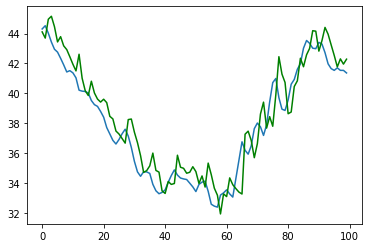

In [12]:
%matplotlib inline

with open(ROOT_DIR+'\\regression_results\\'+df.name + '_' + str(my_seed) +'.txt', 'w') as f:
    f.write(cap.stdout)
    
test_nos = []
for i, val in enumerate(y_test):
    test_nos.append(i)
plt.plot(test_nos, y_test)
plt.plot(test_nos, y_pred, color='green')